# LAB 12

## Całkowanie numeryczne

### 1. Próbki prędkości i przebyta droga

Funkcja `calculate_and_plot_1` przyjmuje wektory prędkości (w km/s) i czasu (w sekundach), konwertuje prędkośc na metry na sekunde, a następnie wywołuje funkcje `calc_distance`, która ma za zadanie stworzyć kumulatywną tabele wyników w danych punktach (w celu narysowania wykresu) oraz wynik całkowity, a następnie konwertuje je na kilometry. Dalej funkcja `calculate_and_plot_1` przygotowywuje wykresy oraz printuje wynik

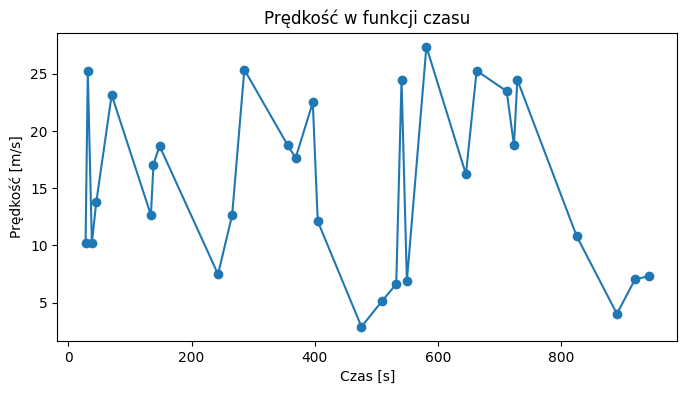

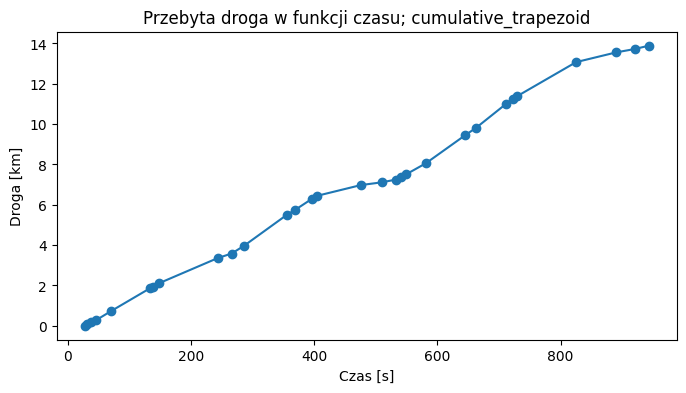

Całkowita przebyta droga 
 - metoda trapezów: 13.885606974643473 km


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, trapezoid


def calc_distance(speed_vector, time_vector):
    distance_cumulative_trapezoid = cumulative_trapezoid(
        speed_vector, time_vector, initial=0) / 1000

    distance_trapezoid = trapezoid(speed_vector, time_vector) / 1000

    return distance_cumulative_trapezoid, distance_trapezoid

def calculate_and_plot_1(speed_vector, time_vector):
    speed_vector = np.array(speed_vector) * (1000 / 3600) #convert to m/s
    time_vector = np.array(time_vector)
    distance_cumulative_trapezoid, distance_trapezoid = calc_distance(speed_vector, time_vector)


    plt.figure(figsize=(8,4))

    plt.plot(time_vector, speed_vector, marker='o')
    plt.title('Prędkość w funkcji czasu')
    plt.xlabel('Czas [s]')
    plt.ylabel('Prędkość [m/s]')
    plt.grid(False)


    plt.figure(figsize=(8,4))

    plt.plot(time_vector,distance_cumulative_trapezoid, marker='o')
    plt.title('Przebyta droga w funkcji czasu; cumulative_trapezoid')
    plt.xlabel('Czas [s]')
    plt.ylabel('Droga [km]')
    plt.grid(False)


    plt.show()

    print(
    f"Całkowita przebyta droga \n - metoda trapezów: {distance_trapezoid} km")

speed_vector = np.random.rand(30)*100  # prędkości w km/h
time_vector = np.random.rand(30)*1000  # czas w sekundach
time_vector.sort()

calculate_and_plot_1(speed_vector,time_vector)


### 2. Złożona kwadratura Simpsona

[wikipedia](https://pl.wikipedia.org/wiki/Metoda_Simpsona)

Do rozwiązania tego zadania potrzebne jest kilka funkcji pomocniczych:

- 3 funkcje liczące wartości $f_1(x)$, $f_2(x)$ i $f_3(x)$. Zostały one napisane w pomocniczym pliku `funkcje.py`

- funkcja wyznaczająca wektory równoodległe i wartości funkcji im odpowiadające, mająca na wejściu przedział 

Oraz funkcje główną która obliczy wartość całki korzystając ze złożonej kwadratury Simpsona, a następnie porówna dokładność z wybraną kwadraturą adaptacyjną (tutaj została zastosowana `scipy.intregrate.quad`)

In [14]:
from scipy import integrate
from funkcje import f1,f2,f3

def simpQuadrature(x, y):
    n = len(x)
    if n < 2 or n % 2 == 0:
        raise ValueError("Input musi być nieparzysty")

    h = x[1] - x[0]
    S = y[0] + y[-1]  # y0 + yn

    for i in range(1, n-1, 2):
        S += 4 * y[i]  # nieparzyste
    for i in range(2, n-1, 2):
        S += 2 * y[i]  # parzyste

    return (h / 3) * S

def create_nodes_and_values(f, lower_limit, upper_limit, amount_points):
    points = np.linspace(lower_limit, upper_limit, amount_points)
    values = []

    for point in points:
        values.append(f(point)) #:troll:
    
    return points, values

def test_functions(f, name, lower_limit, upper_limit, amount_points=100_001):
    print(f"============== TEST {name} ==============")

    points, values = create_nodes_and_values(f,lower_limit,upper_limit,amount_points)

    myRes = simpQuadrature(points, values)
    libRes, _ = integrate.quad(f, lower_limit, upper_limit)

    print(f"  Wynik funkcji lokalnej: {myRes}\n  Wynik funkcji bibliotecznej: {libRes}\n  Różnica wyników: {abs(myRes-libRes)}\n\n")


test_functions(f1, "f1", 10, 20)
test_functions(f2, "f2", 5, 10)
test_functions(f3, "f3", -10, -5)

============== TEST f1 ==============
  Wynik funkcji lokalnej: 9.855230105105856e-45
  Wynik funkcji bibliotecznej: 9.855275617023569e-45
  Różnica wyników: 4.551191771287285e-50


============== TEST f2 ==============
  Wynik funkcji lokalnej: 0.016154796374588835
  Wynik funkcji bibliotecznej: 0.016154796374626506
  Różnica wyników: 3.767125500431234e-14


============== TEST f3 ==============
  Wynik funkcji lokalnej: -3247398.8016590807
  Wynik funkcji bibliotecznej: -3247398.8016673923
  Różnica wyników: 8.311588317155838e-06




Wyniki są podobne w granicy błędów arytmetyki zmiennoprzecinkowej

### 3. Oznaczone całki podwójne